In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import *

In [2]:
no_shows = pd.read_csv('no_shows_cleaned.csv')

In [3]:
no_shows.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0


In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# split dataset in two parts: feature set and target label
feature_set = ['age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']
X = no_shows[feature_set]
y = no_shows.no_show

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [5]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

# fit to data
dtree.fit(X_train,y_train)

# get predictions
dtree_pred = dtree.predict(X_test)

In [6]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix

In [7]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     26402
           1       0.36      0.01      0.02      6749

    accuracy                           0.79     33151
   macro avg       0.58      0.50      0.45     33151
weighted avg       0.71      0.79      0.71     33151



In [8]:
print("Confusion matrix:\n",confusion_matrix(y_test, dtree_pred))

Confusion matrix:
 [[26269   133]
 [ 6673    76]]


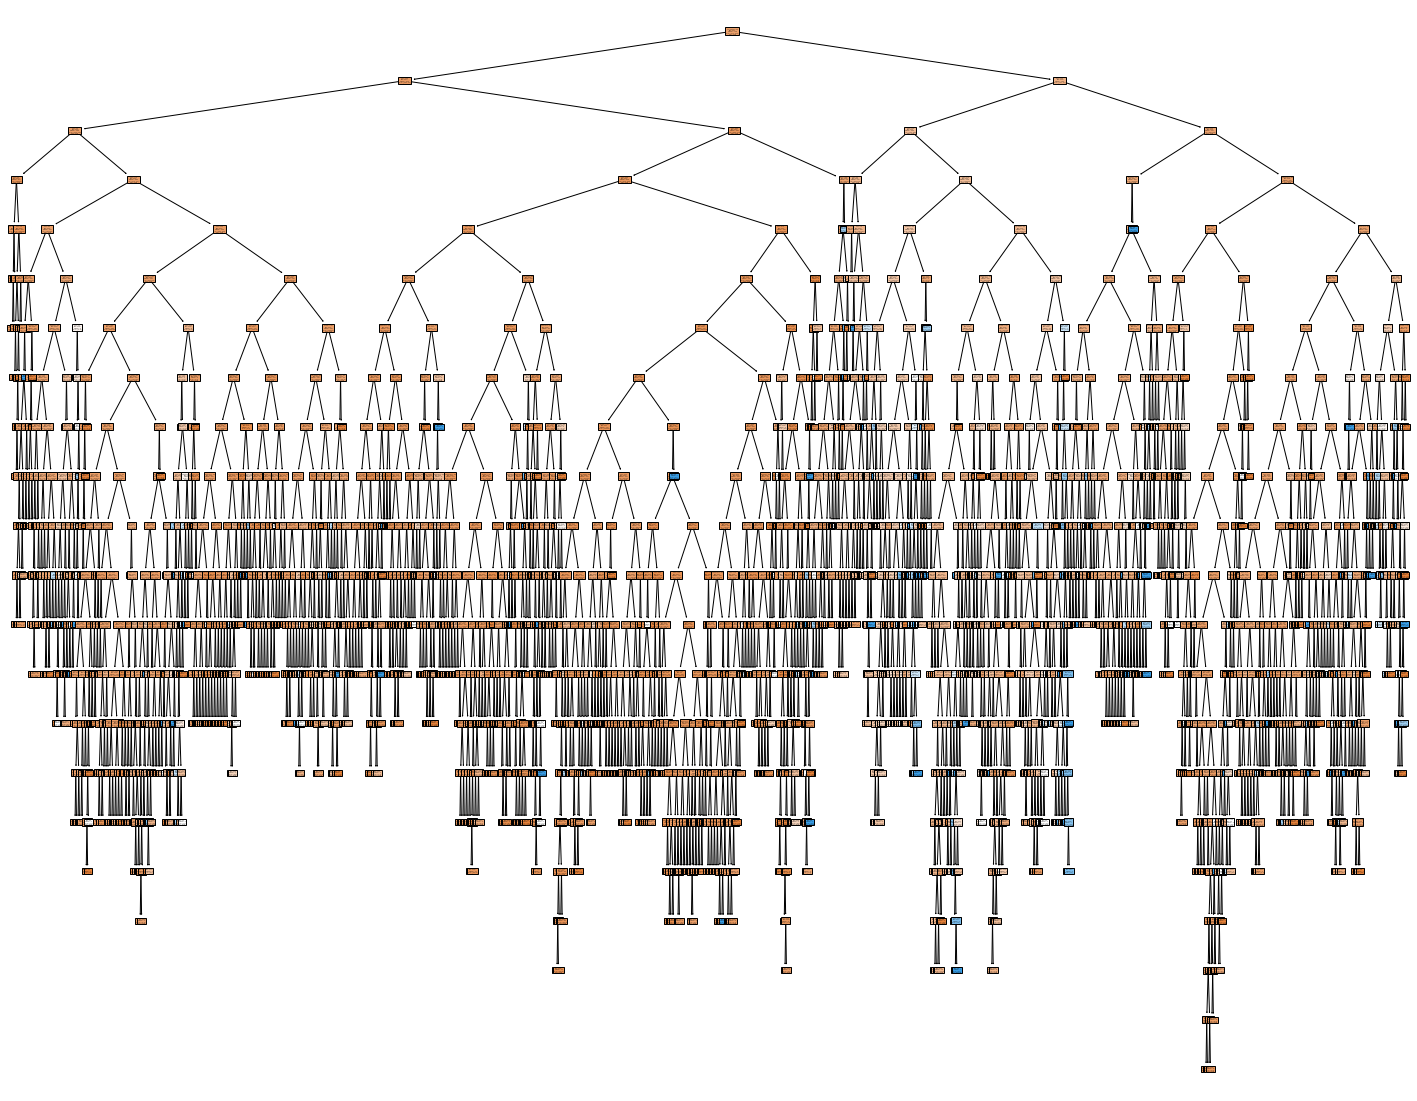

In [10]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree,
                   feature_names = ['age','scholarship','hypertension','diabetes', 'alcoholism', 'handicap', 'sms_received'],
                   class_names = ['Show', 'No Show'],
                   filled=True)